<a href="https://colab.research.google.com/github/msuha3/DataMining/blob/main/EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [10]:
file_path = '/content/drive/My Drive/EastWestAirlinesCluster.csv'
df = pd.read_csv(file_path)
ID = df['ID#']
df.drop(['ID#'], axis=1, inplace=True)
df_norm = df.apply(preprocessing.scale, axis=0)
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


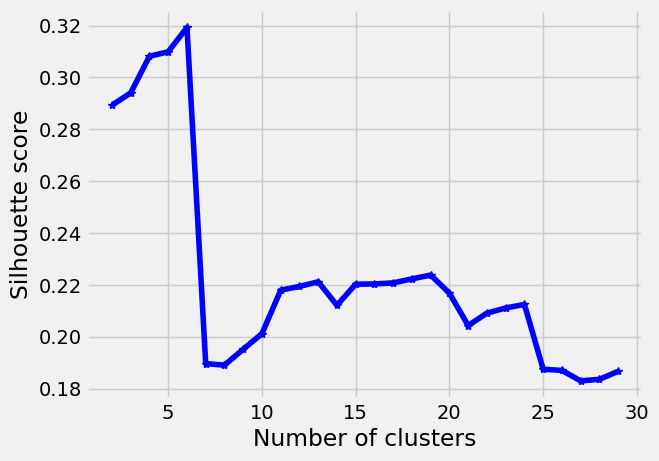

In [15]:
num_clusters = np.arange(2, 30)
sil_score = []

for K in num_clusters:
    clustering = AC(n_clusters=K, metric='euclidean', linkage='ward')
    clusters = clustering.fit_predict(df_norm)
    sil_score.append(silhouette_score(df_norm, clusters))

plt.plot(num_clusters, sil_score, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [19]:
best_K = num_clusters[np.argmax(sil_score)]
print(f'Best number of clusters is {best_K}')

Best number of clusters is 6


In [20]:
Z = linkage(df_norm, method='ward', metric='euclidean')
memb = fcluster(Z, best_K, criterion='maxclust')
memb = pd.Series(memb, index=ID)

for key, item in memb.groupby(memb):
    print('Number of points in cluster {}: {}'.format(key, len(item)))


Number of points in cluster 1: 43
Number of points in cluster 2: 2446
Number of points in cluster 3: 130
Number of points in cluster 4: 18
Number of points in cluster 5: 130
Number of points in cluster 6: 1232


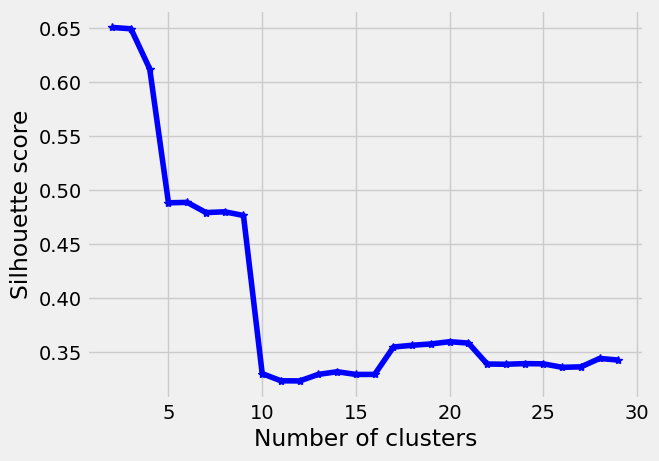

In [22]:
sil_score2 = []

for K in num_clusters:
    clustering = AC(n_clusters=K, metric='euclidean', linkage='ward')
    clusters = clustering.fit_predict(df)
    sil_score2.append(silhouette_score(df, clusters))

plt.plot(num_clusters, sil_score2, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [23]:
best_K2 = num_clusters[np.argmax(sil_score2)]
print(f'Best number of clusters is {best_K2}')

Best number of clusters is 2


In [24]:
best_clustering2 = AC(n_clusters=best_K2,metric='euclidean',linkage='ward')
clusters2 = best_clustering2.fit_predict(df)

In [25]:
df.iloc[clusters2>0,:].describe()[1:3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
mean,39176.370140,103.776050,1.818040,1.015552,1.002488,12010.327527,10.105132,326.557698,0.969207,3875.199689,0.330638
std,29283.562177,649.990865,1.204709,0.152986,0.070513,16202.600986,8.731536,1091.551826,2.963686,2031.875824,0.470516


In [26]:
df.iloc[clusters2==0,:].describe()[1:3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
mean,214769.998724,309.533163,3.049745,1.010204,1.052296,38200.302296,17.739796,1007.500000,3.031888,5116.520408,0.533163
std,153347.046864,1134.878660,1.581769,0.123375,0.415006,36721.084599,10.539406,2178.710932,5.829879,1894.510711,0.499217


In [27]:
best_clustering = AC(n_clusters=best_K, metric='euclidean', linkage='ward')
clusters = best_clustering.fit_predict(df_norm)
cluster_1 = df_norm.iloc[clusters==0,:]
cluster_2 = df_norm.iloc[clusters==1,:]
cluster_3 = df_norm.iloc[clusters==2,:]
cluster_4 = df_norm.iloc[clusters==3,:]
cluster_5 = df_norm.iloc[clusters==4,:]
cluster_6 = df_norm.iloc[clusters==5,:]


In [28]:
centroids = pd.concat([cluster_1.mean(), cluster_2.mean(), cluster_3.mean(),
                       cluster_4.mean(), cluster_5.mean(), cluster_6.mean()],
                      axis=1,
                      keys=['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])


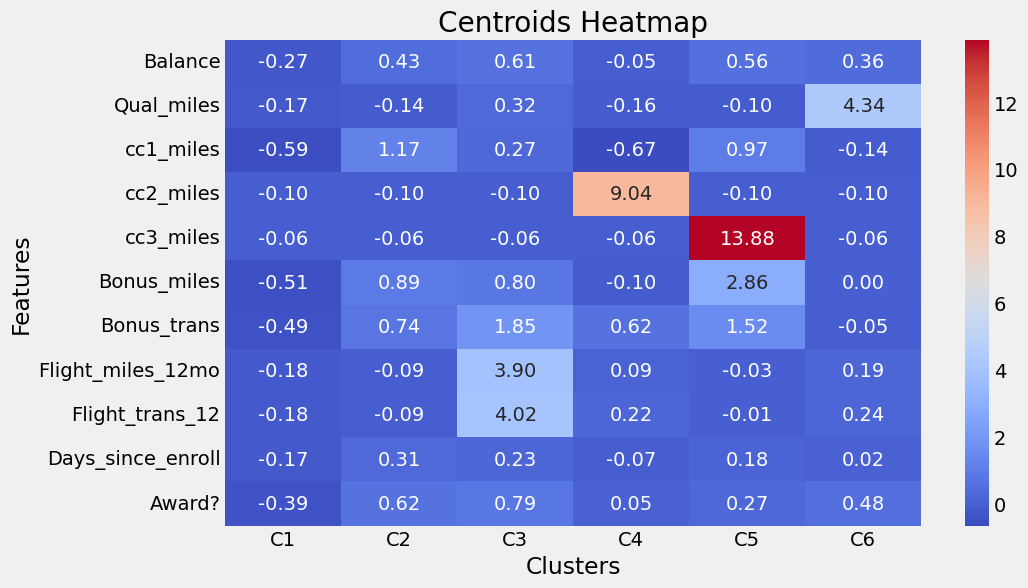

In [29]:
centroids_heatmap = centroids
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_heatmap, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Centroids Heatmap')
plt.xlabel('Clusters')
plt.ylabel('Features')
plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, recall_score,
precision_score, f1_score,
roc_auc_score, confusion_matrix)
from sklearn.neural_network import MLPClassifier

In [35]:
file_path = '/content/drive/My Drive/EastWestAirlinesNN.csv'
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df.drop('ID#', axis=1, inplace=True)
print('Number of unique values in each column:')
for col in df.columns:
  print(col, ':', len(df[col].unique()))

Number of unique values in each column:
Topflight : 2
Balance : 4742
Qual_miles : 196
cc1_miles? : 2
cc2_miles? : 2
cc3_miles? : 2
Bonus_miles : 3228
Bonus_trans : 60
Flight_miles_12mo : 372
Flight_trans_12 : 36
Online_12 : 11
Email : 2
Club_member : 2
Any_cc_miles_12mo : 2
Phone_sale : 2


In [36]:
predictors_cont = ['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo']
df[predictors_cont] = np.log1p(df[predictors_cont])
df['Online_12'] = df['Online_12'].astype('category')
df = pd.get_dummies(df, drop_first=True)
df.head()

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,...,Online_12_1.0,Online_12_2.0,Online_12_3.0,Online_12_4.0,Online_12_5.0,Online_12_6.0,Online_12_8.0,Online_12_9.0,Online_12_10.0,Online_12_11.0
0,0.0,10.245089,0.0,0.0,1.0,0.0,5.164786,1.0,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,9.865007,0.0,0.0,0.0,0.0,5.375278,2.0,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,10.629949,0.0,1.0,0.0,0.0,8.324579,4.0,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,9.600827,0.0,0.0,0.0,0.0,6.216606,1.0,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1.0,11.490199,0.0,1.0,0.0,0.0,10.675931,26.0,7.639161,4.0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
y = df['Phone_sale']
X = df.drop('Phone_sale', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42,
stratify=y)
print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print('Acceptance rate in training data:', y_train.mean())

Training data shape: (3988, 23)
Testing data shape: (997, 23)
Acceptance rate in training data: 0.13139418254764293


In [38]:
# set the cutoff to be the acceptance rate
cutoff = 0.2

In [40]:
mlp1 = MLPClassifier(hidden_layer_sizes=[5],
                     random_state=42,
                     max_iter=200,
                     tol=1e-6)
mlp1.fit(X_train_scaled, y_train)

pred1_train = mlp1.predict_proba(X_train_scaled)[:,1] > cutoff
pred1_test = mlp1.predict_proba(X_test_scaled)[:,1] > cutoff

print('Accuracy (train):', accuracy_score(y_train, pred1_train))
print('Recall (train):', recall_score(y_train, pred1_train))
print('Precision (train):', precision_score(y_train, pred1_train))
print('F1 score (train):', f1_score(y_train, pred1_train))
print('ROC AUC (train):', roc_auc_score(y_train, mlp1.predict_proba(X_train_scaled)[:,1]))

print('--'*25)

print('Accuracy (test):', accuracy_score(y_test, pred1_test))
print('Recall (test):', recall_score(y_test, pred1_test))
print('Precision (test):', precision_score(y_test, pred1_test))
print('F1 score (test):', f1_score(y_test, pred1_test))
print('ROC AUC (test):', roc_auc_score(y_test, mlp1.predict_proba(X_test_scaled)[:,1]))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (train): 0.8116850551654965
Recall (train): 0.20610687022900764
Precision (train): 0.24379232505643342
F1 score (train): 0.22337125129265772
ROC AUC (train): 0.6657996976535092
--------------------------------------------------
Accuracy (test): 0.7923771313941825
Recall (test): 0.20610687022900764
Precision (test): 0.2076923076923077
F1 score (test): 0.20689655172413793
ROC AUC (test): 0.6194577155651146


In [41]:
mlp2 = MLPClassifier(hidden_layer_sizes=[1],
                     random_state=42,
                     max_iter=200,
                     tol=1e-6)
mlp2.fit(X_train_scaled, y_train)

pred2_train = mlp2.predict_proba(X_train_scaled)[:,1] > cutoff
pred2_test = mlp2.predict_proba(X_test_scaled)[:,1] > cutoff

print('Accuracy (train):', accuracy_score(y_train, pred2_train))
print('Recall (train):', recall_score(y_train, pred2_train))
print('Precision (train):', precision_score(y_train, pred2_train))
print('F1 score (train):', f1_score(y_train, pred2_train))
print('ROC AUC (train):', roc_auc_score(y_train, mlp2.predict_proba(X_train_scaled)[:,1]))

print('--'*25)

print('Accuracy (test):', accuracy_score(y_test, pred2_test))
print('Recall (test):', recall_score(y_test, pred2_test))
print('Precision (test):', precision_score(y_test, pred2_test))
print('F1 score (test):', f1_score(y_test, pred2_test))
print('ROC AUC (test):', roc_auc_score(y_test, mlp2.predict_proba(X_test_scaled)[:,1]))


Accuracy (train): 0.816950852557673
Recall (train): 0.16030534351145037
Precision (train): 0.22459893048128343
F1 score (train): 0.1870824053452116
ROC AUC (train): 0.6459598619607566
--------------------------------------------------
Accuracy (test): 0.8074222668004012
Recall (test): 0.12213740458015267
Precision (test): 0.17204301075268819
F1 score (test): 0.14285714285714288
ROC AUC (test): 0.6108192443982159


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
param_grid = {
    'hidden_layer_sizes': [[2], [4], [8], [16]],
    'max_iter': [50, 100, 150, 200],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'batch_size': [4, 8, 16, 32]
}

gridSearch = GridSearchCV(MLPClassifier(random_state=42, tol=1e-7),
                          param_grid, cv=3, n_jobs=-1,
                          scoring='roc_auc',
                          return_train_score=True,
                          refit=True)

gridSearch.fit(X_train_scaled, y_train)

print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)


In [ ]:
mlp3 = gridSearch.best_estimator_
mlp3.fit(X_train_scaled, y_train)

pred_prob_all = pd.DataFrame(np.c_[mlp1.predict_proba(X_test_scaled)[:,1],
                                   mlp2.predict_proba(X_test_scaled)[:,1],
                                   mlp3.predict_proba(X_test_scaled)[:,1]],
                             columns=['MLP1', 'MLP2', 'MLP3'])

print('ROC AUC of model 1:', roc_auc_score(y_test, pred_prob_all['MLP1']))
print('ROC AUC of model 2:', roc_auc_score(y_test, pred_prob_all['MLP2']))
print('ROC AUC of model 3:', roc_auc_score(y_test, pred_prob_all['MLP3']))
print('--'*25)

pred3_test = pred_prob_all['MLP3'] > cutoff

print('Accuracy (test):', accuracy_score(y_test, pred3_test))
print('Recall (test):', recall_score(y_test, pred3_test))
print('Precision (test):', precision_score(y_test, pred3_test))
print('F1 score (test):', f1_score(y_test, pred3_test))
